# Proyek Klasifikasi Gambar: German Traffic Sign Recognition Benchmark GTSRB
- **Nama:** Muhammad Raffa Reyhan
- **Email:** raffareyhan7@gmail.com
- **ID Dicoding:** Muhammad Raffa Reyhan

The dataset contains traffic sign boards from the streets captured into
image files. There are 43 unique classes in total.

The dataset is from: [German Traffic Sign Recognition Benchmark GTSRB](https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html)


This dataset is made available under the “CC0 1.0 Universal (CC0 1.0) Public Domain Dedication” license. The text of the license is available here: https://creativecommons.org/publicdomain/zero/1.0/

In [ ]:
!pip install tensorflowjs

## Import Semua Packages/Library yang Digunakan

In [2]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers, models

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


## Data Preparation

### Data Loading

In [4]:
import urllib.request
import zipfile

def download_and_extract_data():
    url = 'http://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
    urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
    with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        zip_ref.extractall()

### Data Preprocessing

In [5]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

#### Split Dataset

In [6]:
#def solution_model():
download_and_extract_data()

BATCH_SIZE = 32
IMG_SIZE = (30, 30)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory= "train",
        label_mode= "int",
        image_size= IMG_SIZE,
        batch_size = BATCH_SIZE,
        validation_split=0.25,
        subset='training',
        seed=87)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory= "train",
        label_mode= "int",
        image_size=  IMG_SIZE,
        batch_size = BATCH_SIZE,
        validation_split=0.25,
        subset='validation',
        seed=87)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory= "validation",
        label_mode= "int",
        image_size=  IMG_SIZE,
        batch_size = BATCH_SIZE)

train_ds = train_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
        tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
            tf.data.experimental.AUTOTUNE)
test_ds = test_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
        tf.data.experimental.AUTOTUNE)

Found 31367 files belonging to 43 classes.
Using 23526 files for training.
Found 31367 files belonging to 43 classes.
Using 7841 files for validation.
Found 7842 files belonging to 43 classes.


## Modelling

In [7]:
model = tf.keras.models.Sequential([
        layers.Input(shape=(30, 30, 3)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(43, activation='softmax')
    ])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Summary of the Model Architecture
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 917,675 (3.50 MB)

 Trainable params: 917,675 (3.50 MB)

 Non-trainable params: 0 (0.00 B)

None


## Evaluasi dan Visualisasi

In [8]:
class EarlyStoppingAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy=0.95):
        super(EarlyStoppingAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_acc = logs.get("accuracy")  # Training accuracy
        val_acc = logs.get("val_accuracy")  # Validation accuracy

        if train_acc is not None and val_acc is not None:
            if train_acc >= self.target_accuracy and val_acc >= self.target_accuracy:
                print(f"\nStopping training: train_accuracy={train_acc:.4f}, val_accuracy={val_acc:.4f} reached {self.target_accuracy*100:.1f}%")
                self.model.stop_training = True

In [9]:
history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=30,
          verbose = 1,
          callbacks=[EarlyStoppingAtAccuracy(target_accuracy=0.95)])

Epoch 1/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 103s 137ms/step - accuracy: 0.0887 - loss: 3.4616 - val_accuracy: 0.3172 - val_loss: 2.6564
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 97s 132ms/step - accuracy: 0.3345 - loss: 2.4747 - val_accuracy: 0.5383 - val_loss: 1.6700
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 145s 136ms/step - accuracy: 0.5424 - loss: 1.5667 - val_accuracy: 0.7479 - val_loss: 0.9640
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 145s 141ms/step - accuracy: 0.7110 - loss: 1.0043 - val_accuracy: 0.8376 - val_loss: 0.6250
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 138s 135ms/step - accuracy: 0.8055 - loss: 0.6865 - val_accuracy: 0.8427 - val_loss: 0.5508
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 141s 134ms/step - accuracy: 0.8588 - loss: 0.5028 - val_accuracy: 0.9288 - val_loss: 0.3085
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 102s 138ms/step - accuracy: 0.8937 - loss: 0.3781 - val_accuracy: 0.9393 - val_loss: 0.2433
Epoch 8/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 101s 137ms/step - accuracy: 0.9144 - 

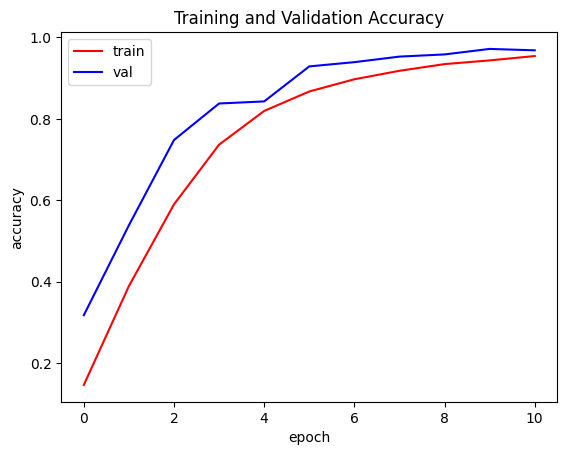

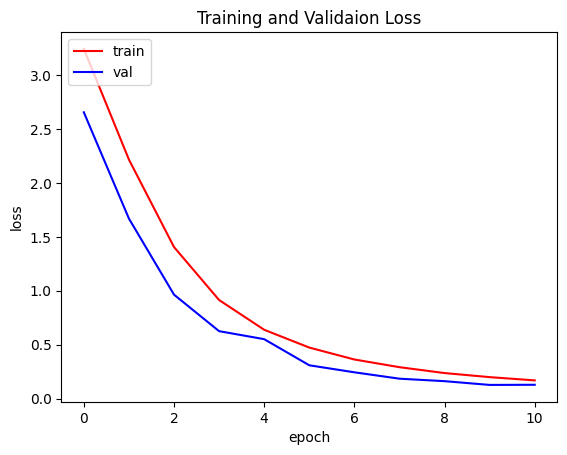

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [11]:
model.save("model.h5")

In [12]:
from tensorflow.keras.models import load_model

# Load best hyperparameters dari hasil pembelajaran model yang telah dilakukan
best_model = load_model('model.h5')

# Lakukan evaluasi kinerja model dengan test set
best_model.evaluate(test_ds)

246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9682 - loss: 0.1217


[0.11749465763568878, 0.9690130352973938]

## Konversi Model

### TFJS

In [13]:
# Convert model.h5 to model
#!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-02-26 00:59:59.031530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740531599.069361    6477 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740531599.080810    6477 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


### tflite

In [14]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

9372

### TensorFlow Serving

In [15]:
save_path = os.path.join("models/rps_model/1/")
tf.saved_model.save(model, save_path)

## Inference (Optional)